In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
idade = pd.Series(np.random.randint(15,50,1000))

In [3]:
deficiencia = pd.Series(np.random.randint(0,3,1000))

0 não apresenta deficiência 


1 apresenta deficiência visual


2 apresenta deficiência auditiva

In [4]:
deficiencia.value_counts()

0    344
1    336
2    320
dtype: int64

In [5]:
cpf = pd.Series(np.random.randint(10000,50000,1000))

In [6]:
visitante_tipo = pd.Series(np.random.randint(0,2,1000))

In [7]:
tempo_medio_min = pd.Series(np.random.randint(1,121,1000))

tempo médio é composto pelos acessos/tempo online em loja física

In [8]:
cols = ['deficiencia','cpf','idade','visitante_tipo','tempo_medio_min']

In [9]:
series = [deficiencia,cpf,idade,visitante_tipo,tempo_medio_min]

In [10]:
df = pd.DataFrame(columns=cols)

In [11]:
df.deficiencia = deficiencia
df.cpf = cpf
df.idade = idade
df.visitante_tipo = visitante_tipo
df.tempo_medio_min = tempo_medio_min

In [12]:
df

,deficiencia,cpf,idade,visitante_tipo,tempo_medio_min
0,0,47036,24,0,15
1,0,46705,23,0,15
2,0,42276,44,0,69
3,1,43024,37,0,25
4,2,36156,37,0,33
...,...,...,...,...,...
995,2,20161,32,1,103
996,1,19735,39,1,60
997,1,13827,40,1,22
998,0,39039,16,1,6


In [13]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=4)

In [14]:
df_train = df.drop(['cpf','deficiencia'],axis=1)

In [15]:
clus.fit(df_train)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [16]:
df['grupos'] = clus.labels_

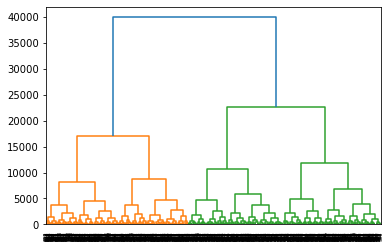

In [17]:
dend = shc.dendrogram(shc.linkage(df, method='complete'))

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deficiencia,1000.0,0.976,0.814916,0.0,0.00,1.0,2.0,2.0
cpf,1000.0,29914.078,11750.374617,10069.0,19600.75,29825.5,40577.0,49999.0
idade,1000.0,31.930,10.226714,15.0,23.00,32.0,41.0,49.0
visitante_tipo,1000.0,0.500,0.500250,0.0,0.00,0.5,1.0,1.0
tempo_medio_min,1000.0,58.478,34.286252,1.0,29.00,56.0,89.0,120.0
grupos,1000.0,1.134,1.139887,0.0,0.00,1.0,2.0,3.0


In [19]:
faixas_etarias = [0,15,22,31,41,50]

In [20]:
df['faixa_etaria'] = pd.cut(df['idade'], faixas_etarias)

<AxesSubplot:xlabel='faixa_etaria'>

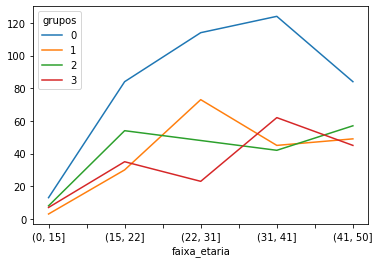

In [21]:
pd.crosstab(df['faixa_etaria'], df['grupos']).plot()

In [22]:
faixa_tempo = [0,29,60,90,121]

In [23]:
df['faixa_tempo'] = pd.cut(df['tempo_medio_min'], faixa_tempo)

<AxesSubplot:xlabel='faixa_tempo'>

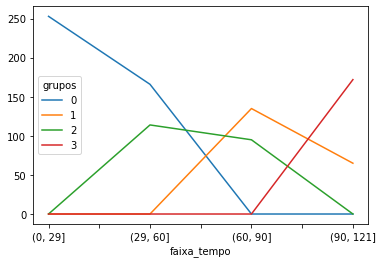

In [24]:
pd.crosstab(df['faixa_tempo'],df['grupos']).plot()